In [1]:
import keras
import os

from params import get_params
from sklearn import preprocessing
import sklearn.preprocessing
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input

from PIL import Image, ImageOps

import pickle

Using TensorFlow backend.


In [2]:
validation_dir = "tb2017/val"
train_dir = "tb2017/train"

In [3]:
conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')


Found 1200 images belonging to 2 classes.
Found 478 images belonging to 2 classes.


In [6]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'fc2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [7]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 54s 539ms/step - loss: 0.0035 - acc: 1.0000 - val_loss: 1.4105e-05 - val_acc: 1.0000
Epoch 2/100
100/100 [==============================] - 44s 439ms/step - loss: 3.1659e-06 - acc: 1.0000 - val_loss: 2.0072e-07 - val_acc: 1.0000
Epoch 3/100
100/100 [==============================] - 44s 438ms/step - loss: 1.4025e-07 - acc: 1.0000 - val_loss: 1.2184e-07 - val_acc: 1.0000
Epoch 4/100
100/100 [==============================] - 42s 424ms/step - loss: 1.2034e-07 - acc: 1.0000 - val_loss: 1.1981e-07 - val_acc: 1.0000
Epoch 5/100
100/100 [==============================] - 44s 435ms/step - loss: 1.2010e-07 - acc: 1.0000 - val_loss: 1.1957e-07 - val_acc: 1.0000
Epoch 6/100
100/100 [==============================] - 42s 425ms/step - loss: 1.1963e-07 - acc: 1.0000 - val_loss: 1.1933e-07 - val_acc: 1.0000
Epoch 7/100
100/100 [==============================] - 43s 434ms/step - loss: 1.1939e-07 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0

In [13]:
model.save('terrassa_building.h5')
np.save('history_terrassa_building.npy', history.history)

In [14]:
history_dict = np.load('history_terrassa_building.npy')
model.load_weights('terrassa_building.h5')

acc = history_dict.item().get('acc')
val_acc = history_dict.item().get('val_acc')
loss = history_dict.item().get('loss')
val_loss = history_dict.item().get('val_loss')

In [15]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

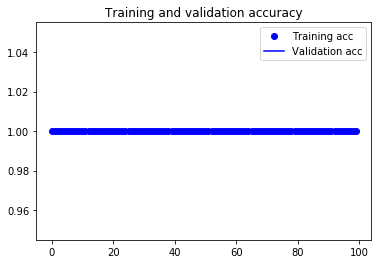

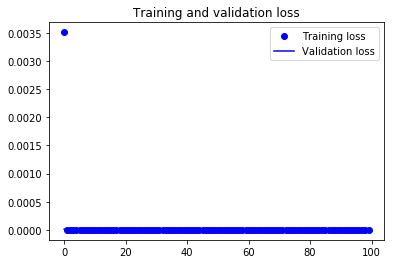

In [16]:
import matplotlib.pyplot as plt


epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()